#### Creation of dataset

In [41]:
import pandas as pd 
import numpy as np 
import random 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import roc_auc_score, accuracy_score


We are using the Kaggle Credit Card Fruad Dataset https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud as a reference to create our own dataset. In this kaggle dataset, there are 31 columns and close to 284k transactions. of these 492 are frauds, ie a 0.172% of them are frauds. The 31 columns have 28 feature vectors that have undergone Principal component analysis to obscure the data. The other columns correspond to Time elapsed, amount of the transaction, and Class (ie fraudulent or not)

In order to model this dataset, for our own, we are maintain the percentage of fraud to be 0.172%, but with 1000 rows instead of 284k and about 10 columns in place of 31. These columns maintain the time elapsed, amount and class, along with 7 feature vectors.

In [9]:
#Creating amount data 
#DO NOT RUN AGAIN ( or Twice)
'''amount = []
time = []
class_val = []
v1,v2,v3,v4,v5,v6,v7 = [],[],[],[],[],[],[]
#populating with valid transaction data
for i in range(9982):
    amount.append(round(random.randrange(0,513)+random.random(),2))
    v1.append(round(random.randrange(-5,3)+random.random(),2))
    v2.append(round(random.randrange(-3,3)+random.random(),2))
    v3.append(round(random.randrange(-3,3)+random.random(),2))
    v4.append(round(random.randrange(-1,2)+random.random(),2))
    v5.append(round(random.randrange(-1,1)+random.random(),2))
    v6.append(round(random.randrange(-3,1)+random.random(),2))
    v7.append(round(random.randrange(-1,2)+random.random(),2))
    time.append(random.randrange(0,500))
    class_val.append(0)

#populating for fraud data (0.172%)
for i in range(18):
    
    amount.append(round(random.randrange(0,513)+random.random(),2))
    v1.append(round(random.randrange(-5,3)+random.random(),2))
    v2.append(round(random.randrange(-3,3)+random.random(),2))
    v3.append(round(random.randrange(-3,3)+random.random(),2))
    v4.append(round(random.randrange(-1,2)+random.random(),2))
    v5.append(round(random.randrange(-1,1)+random.random(),2))
    v6.append(round(random.randrange(-3,1)+random.random(),2))
    v7.append(round(random.randrange(-1,2)+random.random(),2))
    time.append(random.randrange(0,500))
    class_val.append(1)

credit_card = {'amount':amount,'v1':v1,'v2':v2,'v3':v3,'v4':v4,'v5':v5,'v6':v6,'v7':v7,'time':time,"class":class_val}
data = pd.DataFrame(credit_card)
data.to_csv('credit_card.csv')
data.head(10)'''

,amount,v1,v2,v3,v4,v5,v6,v7,time,class
0,330.61,-0.34,2.16,2.77,1.46,-0.23,0.14,-0.22,303,0
1,157.33,-4.68,-1.49,-1.88,1.77,-0.85,-0.50,1.19,254,0
2,311.03,-2.90,2.17,-0.07,1.83,0.66,0.35,0.21,165,0
3,374.31,-4.32,-2.02,-1.50,-0.93,0.89,0.98,-0.06,430,0
4,94.69,-3.73,0.87,2.07,0.97,-0.90,0.95,1.62,375,0
5,401.11,0.14,-1.19,-2.02,1.69,-0.81,-1.61,-0.96,251,0
6,232.55,-4.86,-2.46,0.10,1.30,0.64,-2.77,-0.57,469,0
7,199.15,1.88,1.75,1.73,-0.11,0.19,-0.23,0.02,163,0
8,274.41,-2.77,0.48,-2.45,1.72,0.87,-0.26,1.27,470,0
9,240.41,-0.55,-2.77,-0.19,1.38,0.29,-0.19,-0.56,258,0


At this point, we have created a dataset of a 10000 points with 0.172% of them being a fraudulent transaction. We are saving the created dataset in a csv file and will henceforth use that csv file for further predictions. The above generating code need not be run any further. 

Now that we have a CSV dataset, we can begin the data exploration phase

#### Exploration

In [49]:
df = pd.read_csv('credit_card.csv')
df.describe()

,Unnamed: 0,amount,v1,v2,v3,v4,v5,v6,v7,time,class
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4999.50000,261.630381,-1.044247,0.008412,-0.005146,0.505931,0.002728,-0.996209,0.513070,249.300300,0.00180
std,2886.89568,147.960832,2.328264,1.718608,1.733101,0.859637,0.575048,1.148298,0.857125,144.815932,0.04239
min,0.00000,0.000000,-5.000000,-3.000000,-3.000000,-1.000000,-1.000000,-3.000000,-1.000000,0.000000,0.00000
25%,2499.75000,133.640000,-3.060000,-1.480000,-1.520000,-0.240000,-0.500000,-2.000000,-0.230000,123.000000,0.00000
50%,4999.50000,265.900000,-1.065000,0.030000,-0.010000,0.500000,-0.000000,-0.990000,0.520000,251.000000,0.00000
75%,7499.25000,390.060000,0.990000,1.480000,1.520000,1.250000,0.500000,-0.020000,1.252500,374.000000,0.00000
max,9999.00000,512.920000,3.000000,3.000000,3.000000,2.000000,1.000000,1.000000,2.000000,499.000000,1.00000


In [4]:
#Checking for Null or missing values
df.isnull().sum()

Unnamed: 0    0
amount        0
v1            0
v2            0
v3            0
v4            0
v5            0
v6            0
v7            0
time          0
class         0
dtype: int64

array([[<AxesSubplot: title={'center': 'time'}>]], dtype=object)

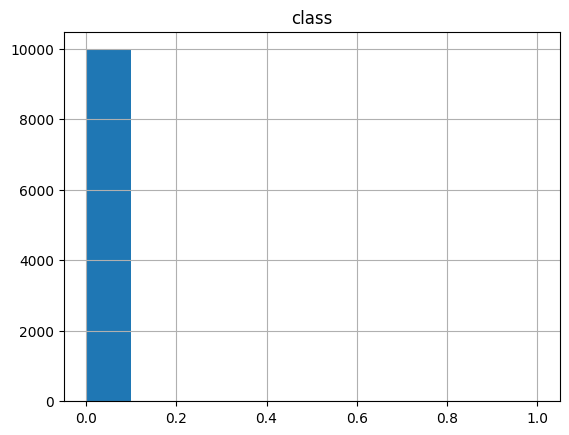

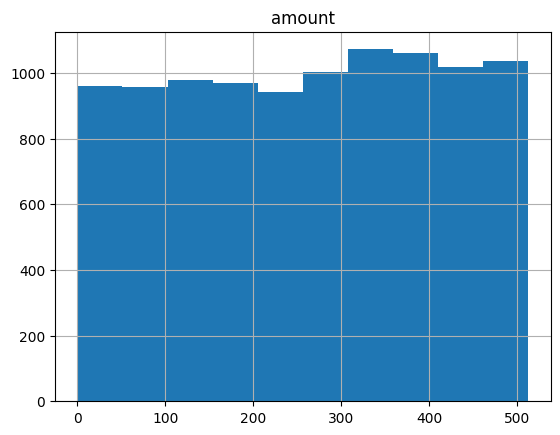

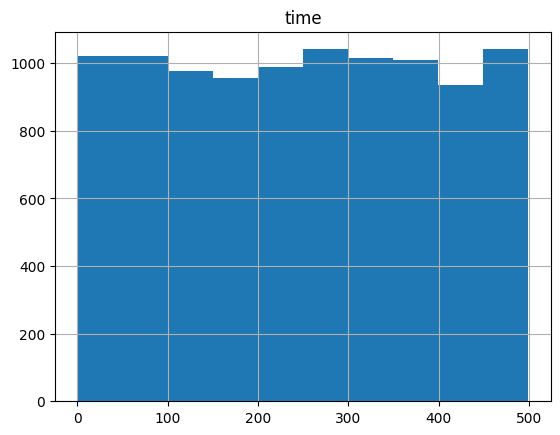

In [5]:
#Since there are no missing and null values, we can proceed to checking the variantion. 
#Here we are plotting histograms to further understand the range of data
df.hist(column = 'class')
df.hist(column='amount')
df.hist(column = 'time')

SO the Class column is unbalanced whereas the other two are well balanced

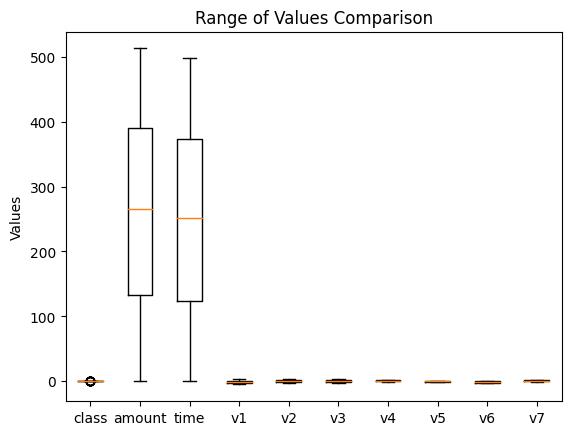

In [10]:
columns = ['class','amount','time','v1','v2','v3','v4','v5','v6','v7']
plt.boxplot([df[column] for column in columns], labels=columns)
plt.title('Range of Values Comparison')
plt.ylabel('Values')
plt.show()

As it is seen there is a drastic variance between the column values. This dataset need to be normalised. Since there amount and time values are well over 200 and the remaining hover between 0 and 1. 

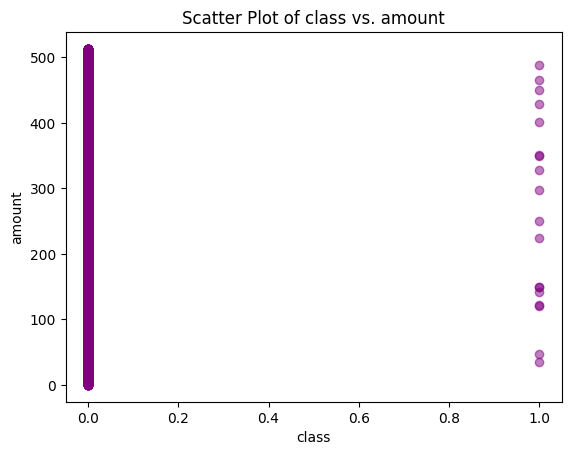

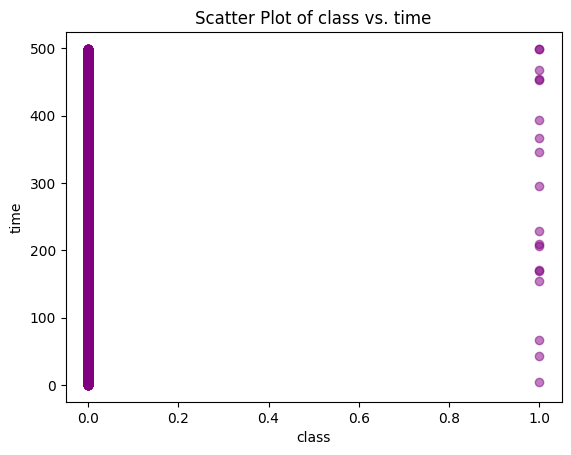

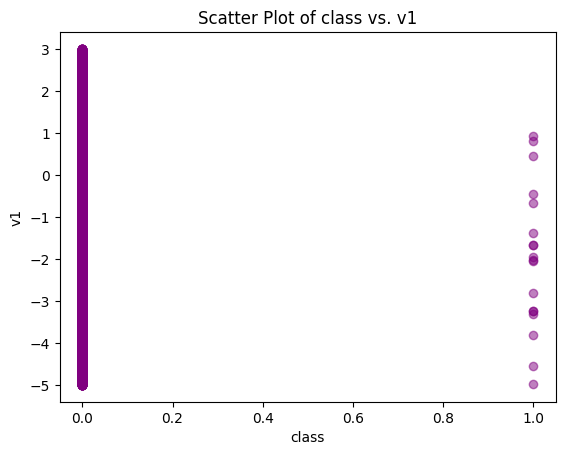

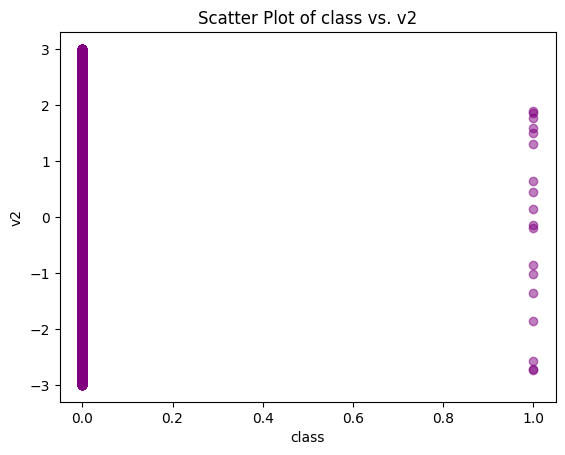

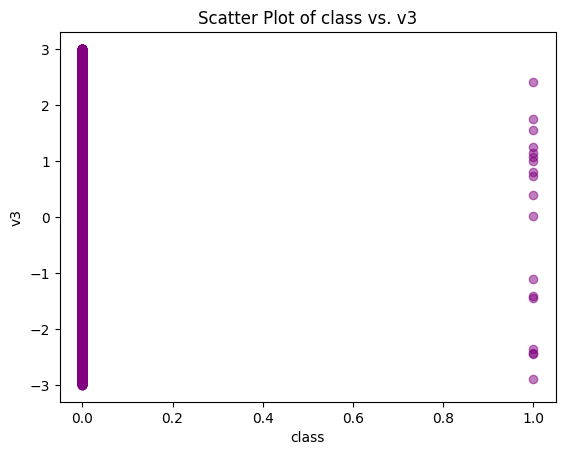

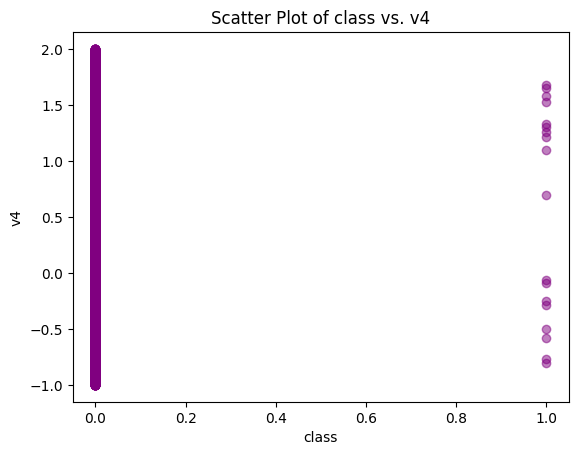

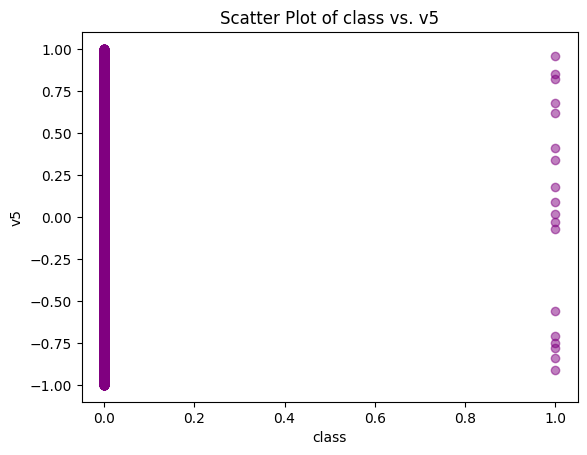

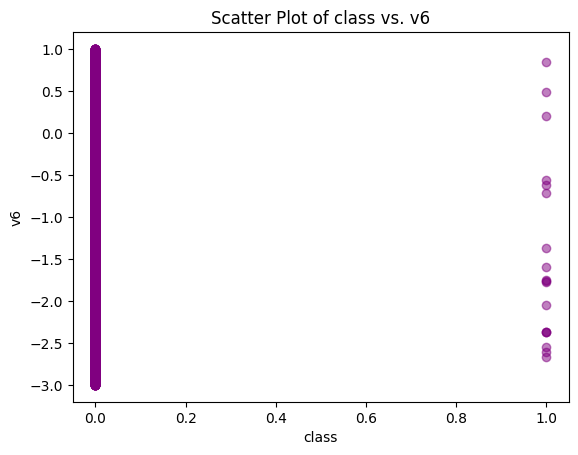

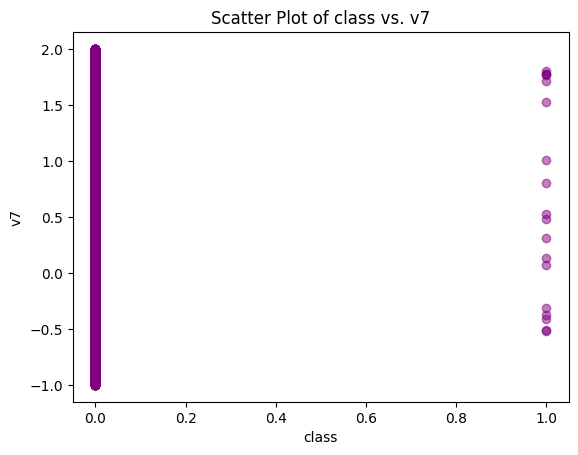

In [14]:
#Since class is the target variable, we are building a few scatter plots to see if any relationship arises amongst the variables. 

x_column = 'class'

columns = ['amount','time','v1','v2','v3','v4','v5','v6','v7']
for i in columns:
    y_column = i
    # Create a scatter plot
    plt.scatter(df[x_column], df[y_column], color='purple', alpha=0.5)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'Scatter Plot of {x_column} vs. {y_column}')
    plt.show()

Since the class variable was binary in nature we are unable to find any direct correlation between the class variable and the given feature set. So all the features are to be considered equally important. 

#### Data Preparation

From the Data exploration stage we found the class variable to be very unbalanced and of a binary nature. From this we can infer the problem to be solved using binary classification algorithms. Also there existed no consistent range amongst the feature variables thus we have to perform normalisation. There were no null or missing values so we need not remove those

Here we are using z-score normalisatin in order to normalise the data. This will fit the data into a standard gaussian distribution which is the optimal distribution for our data 

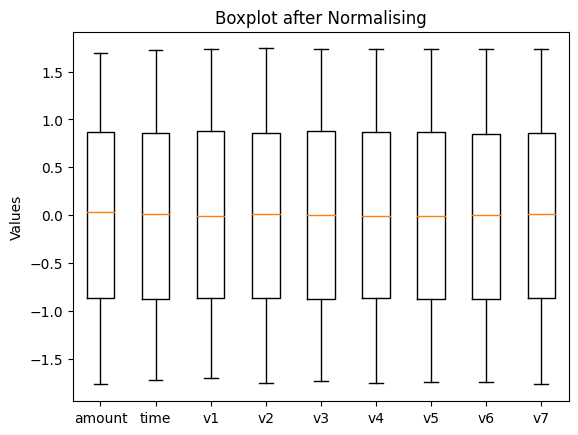

In [18]:
columns_to_normalize = ['amount','time','v1','v2','v3','v4','v5','v6','v7']

# Min-Max scaling (normalize to [0, 1] range)
df_normalized = (df[columns_to_normalize] - df[columns_to_normalize].mean()) / (df[columns_to_normalize].std())

# Replace the original columns with the normalized values
df[columns_to_normalize] = df_normalized

#plotting the box plot again to show the difference 
plt.boxplot([df[column] for column in columns_to_normalize], labels=columns_to_normalize)
plt.title("Boxplot after Normalising")
plt.ylabel("Values")
plt.show()

Alternatively using min-max scaling

In [17]:
#Not used for now
# df_normalized = (df[columns_to_normalize] - df[columns_to_normalize].min()) / (df[columns_to_normalize].max()-df[columns_to_normalize].min())

# # Replace the original columns with the normalized values
# df[columns_to_normalize] = df_normalized

# #plotting the box plot again to show the difference 
# plt.boxplot([df[column] for column in columns_to_normalize], labels=columns_to_normalize)
# plt.title("Boxplot after Normalising")
# plt.ylabel("Values")
# plt.show()


In [19]:
df.describe()

,Unnamed: 0,amount,v1,v2,v3,v4,v5,v6,v7,time,class
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.00000
mean,4999.50000,6.039613e-17,1.534772e-16,-6.750156e-17,-1.312728e-16,-7.673862e-17,3.169021e-16,-1.421085e-18,-2.597034e-16,9.947598e-18,0.00180
std,2886.89568,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.04239
min,0.00000,-1.768241e+00,-1.699014e+00,-1.750493e+00,-1.728032e+00,-1.751822e+00,-1.743730e+00,-1.745009e+00,-1.765285e+00,-1.721498e+00,0.00000
25%,2499.75000,-8.650288e-01,-8.657750e-01,-8.660567e-01,-8.740716e-01,-8.677278e-01,-8.742368e-01,-8.741553e-01,-8.669328e-01,-8.721437e-01,0.00000
50%,4999.50000,2.885641e-02,-8.913507e-03,1.256133e-02,-2.800761e-03,-6.899423e-03,-4.743953e-03,5.407132e-03,8.085166e-03,1.173697e-02,0.00000
75%,7499.25000,8.679974e-01,8.737182e-01,8.562674e-01,8.800101e-01,8.655618e-01,8.647489e-01,8.501355e-01,8.626860e-01,8.610910e-01,0.00000
max,9999.00000,1.698352e+00,1.737022e+00,1.740704e+00,1.733971e+00,1.738023e+00,1.734242e+00,1.738406e+00,1.734787e+00,1.724256e+00,1.00000


Now with the normalised data, that has no missing values, all essential features, we can move onto to actually deciding on a good prediction model that will help us solve the problem. 

#### Prediction

Now that we have moved onto prediction. The given target class is very unbalanced and thus will require a model for outlier detection. Based on the data ranges and the close normalisation of the data, two models Isolation forest and OneClassSvm have been chosen

In [97]:
#Performing train-test split
y = df['class']
y.replace(0,-1,inplace=True)
y.replace(1,1,inplace=True)

X = df.drop('class',axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train = X_train.values

In [107]:
#Isolation Forest code

model = IsolationForest(contamination=0.5,random_state=13)
model.fit(X_train)
y_pred = model.predict(X_test)
#Finding ROC-AUC score

accuracy = accuracy_score(y_test,y_pred)
 #Fit the model to your training data

print(f"Accuracy : {accuracy}")







Accuracy : 0.5055


/Users/prinks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


In [109]:
#one Class SVM
model = OneClassSVM(nu = 0.9)
model.fit(X_train)
y_pred_svm = model.predict(X_test)

accuracy_svm = accuracy_score(y_test,y_pred_svm)
print(f"Accuracy of SVM is : {accuracy_svm}")

/Users/prinks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but OneClassSVM was fitted without feature names
  warnings.warn(


Accuracy of SVM is : 0.903


Cleary the OneClassSVM is doing a better perfomance that Isolation Forest. 
So now we proceed to precision and recall matric evaluation 


In [111]:
#Precision matrix 
#This finds the positive prediction value 
#Precision = TP / (TP + FP)

# y_true = y_test.values
# y_pred = y_pred_svm.values
#Positive being classified as fraud (outlier)

true_positives = np.sum((y_test == -1) & (y_pred_svm == -1))
false_positives = np.sum((y_test == 1) & (y_pred_svm == -1))
precision = true_positives / (true_positives + false_positives)

print("Precision:", precision)

Precision: 1.0


In [113]:
#Recall matrix
#This is the negative prediction values
true_positives = np.sum((y_test== -1) & (y_pred_svm == -1))
false_negatives = np.sum((y_test== -1) & (y_pred_svm == 1))
recall = true_positives / (true_positives + false_negatives)
print("Recall:", recall)

Recall: 0.903


Thus we have completed analysing the data science process to predict fraud in credit card transactions. From the above matrix scores, the prediction model is able to avoid false positives fairly better but is lagging in terms of avoiding false negatives. 

With this the model selection and data science process have come to an end